In [87]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [88]:
# load the data tips from sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [89]:
print("The max total bill is ",df['total_bill'].max())
print("The max tip is ",df['tip'].max())

The max total bill is  50.81
The max tip is  10.0


In [90]:
same_row = df['total_bill'].idxmax() == df['tip'].idxmax()
print(same_row)

if same_row:
    print(df.loc[df['total_bill'].idxmax()])



True
total_bill     50.81
tip             10.0
sex             Male
smoker           Yes
day              Sat
time          Dinner
size               3
Name: 170, dtype: object


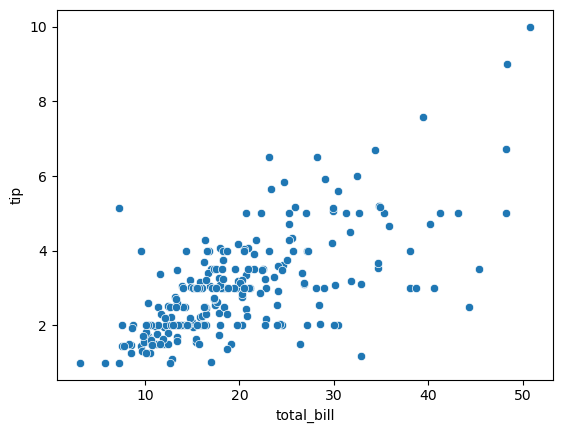

In [91]:
sns.scatterplot(x='total_bill',y='tip',data=df)
plt.show()

In [92]:
# split the data into X and y
X = df[['total_bill']]
y = df['tip']

<Axes: ylabel='Count'>

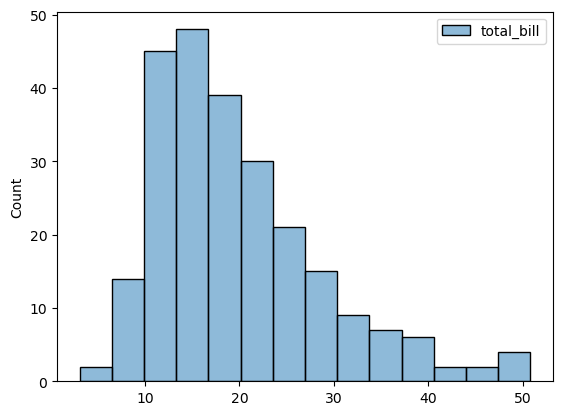

In [93]:
sns.histplot(X)

In [94]:
# scalar = MinMaxScaler()
# X = scalar.fit_transform(X)

In [95]:
# split the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) 

In [96]:
# call the mode
model = LinearRegression()
# train the model
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [97]:
# take out model intercept and slop, make an equation
print(model.intercept_)
print(model.coef_)
print('y = ', model.intercept_, '+', model.coef_, '* X')

0.9111732669302035
[0.10624518]
y =  0.9111732669302035 + [0.10624518] * X


In [98]:
model.predict([[5]])

array([1.44239914])

In [99]:
# predict
y_pred = model.predict(X_test)

In [100]:
# evaluate the model
print('MSE = ', mean_squared_error(y_test, y_pred))
print('R2 = ', r2_score(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE =  0.9984595171578932
R2 =  0.496514943415749
RMSE =  0.9992294617143217


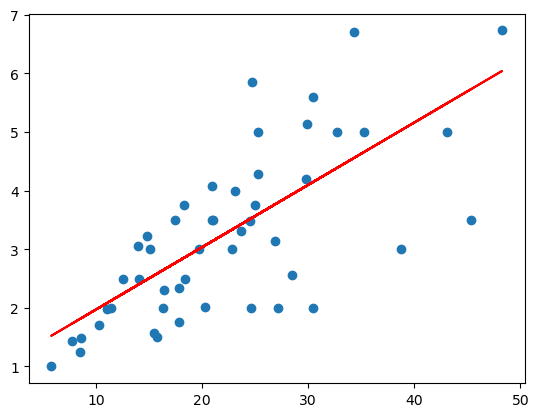

In [101]:
# plot the model and data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()